# Oversampling and Undersampling Case Study on Banking Classification

## Importing the modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/HegdeChaitra/Bank-Marketing-Campaign-Analysis/master/bank-additional-full.csv", sep=';')

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# statistical info
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# find unique values
data.apply(lambda x: len(x.unique()))

,0
age,78
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5


## Exploratory Data Analysis

In [ ]:
# Identify the umbalanced column

data['y'].value_counts()

,count
y,
no,36548
yes,4640


In [ ]:
# Calculate class percentages

(data['y'].value_counts() / data['y'].value_counts().sum()) * 100

,count
y,
no,88.734583
yes,11.265417


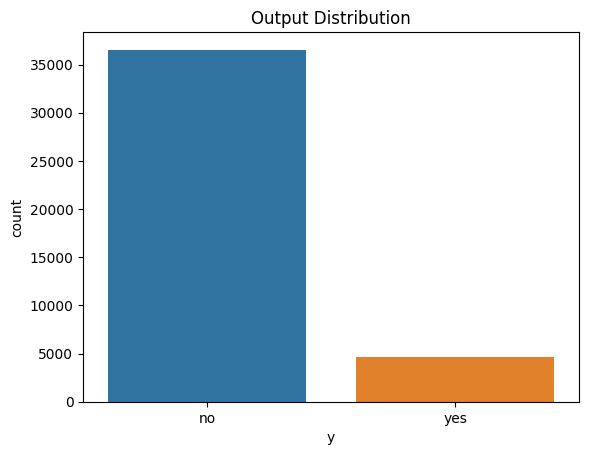

In [ ]:
# Displaying the distribution of target variable "y"

sns.countplot(x = data["y"], palette = sns.color_palette())
plt.title("Output Distribution")
plt.show()

([<matplotlib.patches.Wedge at 0x7d9aef9137c0>,
 [Text(-1.0318259710710267, 0.3812284950306482, 'no'),
  Text(1.031825997840915, -0.3812284225757576, 'yes')])

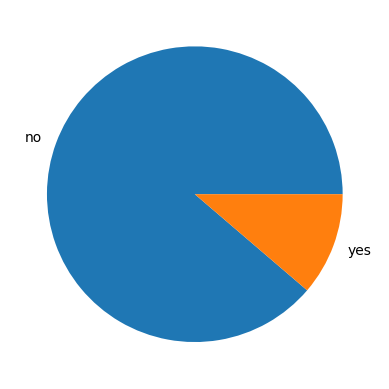

In [ ]:
plt.pie(x=data['y'].value_counts(), labels=data['y'].unique())

([<matplotlib.patches.Wedge at 0x7d9aef7fc280>,
 [Text(-1.0318259710710267, 0.3812284950306482, 'no'),
  Text(1.031825997840915, -0.3812284225757576, 'yes')])

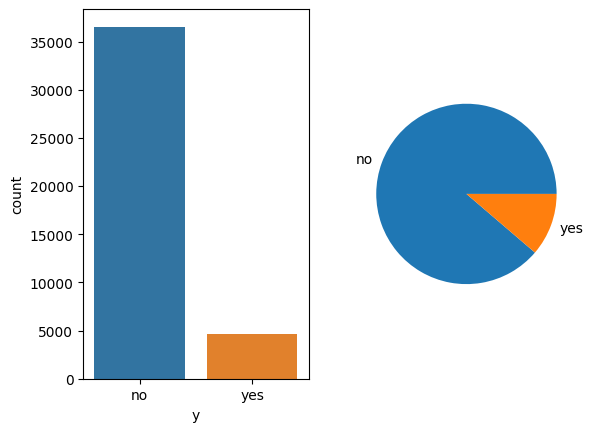

In [ ]:
fig, axes = plt.subplots(1, 2)

#create chart in each subplot
sns.countplot(x = data["y"], palette = sns.color_palette(), ax=axes[0])
axes[1].pie(x=data['y'].value_counts(), labels=data['y'].unique())

In [ ]:
# Function to create pie and count plot for given target variable class distribution

def plot_pie_count(y, sampling_title, palette):
  fig, axes = plt.subplots(1, 2)

  fig.suptitle("Distribution After " +sampling_title)

  #create chart in each subplot
  sns.countplot(x = y, palette = sns.color_palette(palette), ax=axes[0])
  axes[1].pie(x=y.value_counts(), labels=y.unique(), colors = sns.color_palette(palette).as_hex())

## Preprocessing the dataset

In [ ]:
# check for duplicate values
data.duplicated().any()

True

In [ ]:
# dropping the duplicate values
dups = data.duplicated()
data.drop_duplicates(inplace=True)
# reset indices after dropping rows
data=data.reset_index(drop=True)

# check after dropping the duplicate values
data.duplicated().any()

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# encoding values using one hot encoding to improve the metric
# label encoding
cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Input Split

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

In [ ]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41172,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41173,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41174,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41171,1
41172,0
41173,0
41174,1


In [ ]:
y.shape

(41176,)

In [ ]:
y.value_counts()

,count
y,
0,36537
1,4639


## SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
y_res

,y
0,0
1,0
2,0
3,0
4,0
...,...
73069,1
73070,1
73071,1
73072,1


In [ ]:
y_res.shape

(73074,)

In [ ]:
y_res.value_counts()

,count
y,
0,36537
1,36537


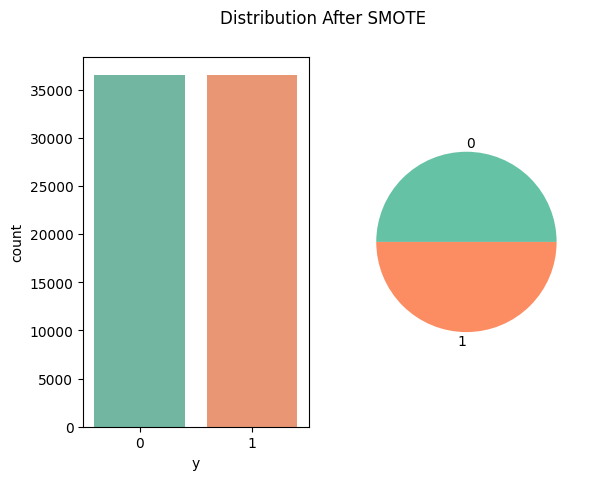

In [ ]:
plot_pie_count(y_res, "SMOTE", "Set2")

## ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
ada = ADASYN(random_state=42)
X_res_a, y_res_a = ada.fit_resample(X, y)

In [ ]:
y_res_a

,y
0,0
1,0
2,0
3,0
4,0
...,...
73185,1
73186,1
73187,1
73188,1


In [ ]:
y_res_a.shape

(73190,)

In [ ]:
y_res_a.value_counts()

,count
y,
1,36653
0,36537


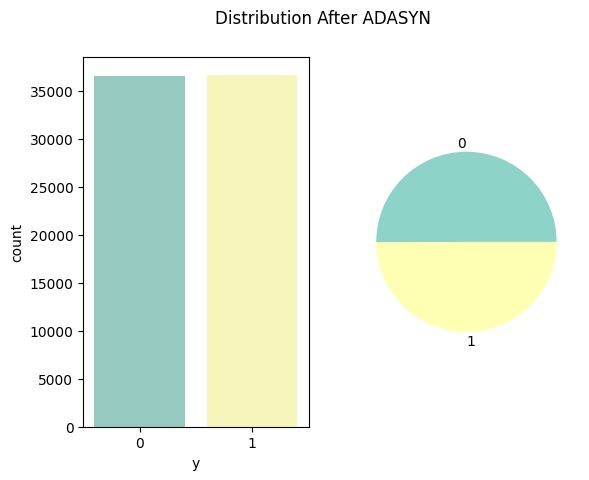

In [ ]:
plot_pie_count(y_res_a, "ADASYN", "Set3")

## Borderline SMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

In [ ]:
sm = BorderlineSMOTE(random_state=42)
X_res_b, y_res_b = sm.fit_resample(X, y)

In [ ]:
y_res_b.shape

(73074,)

In [ ]:
y_res_b.value_counts()

,count
y,
0,36537
1,36537


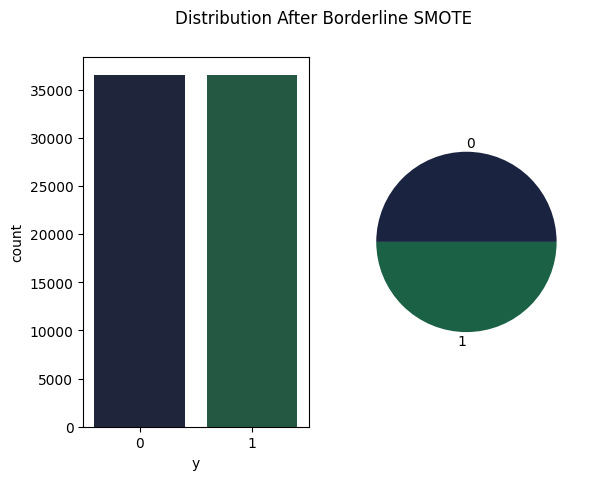

In [ ]:
plot_pie_count(y_res_b, "Borderline SMOTE", "cubehelix")

## Random Undersampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res_r, y_res_r = rus.fit_resample(X, y)

In [ ]:
y_res_r

,y
13264,0
24376,0
17150,0
15304,0
17546,0
...,...
41162,1
41166,1
41169,1
41171,1


In [ ]:
y_res_r.value_counts()

,count
y,
0,4639
1,4639


In [ ]:
len(y) - len(y_res_r)

31898

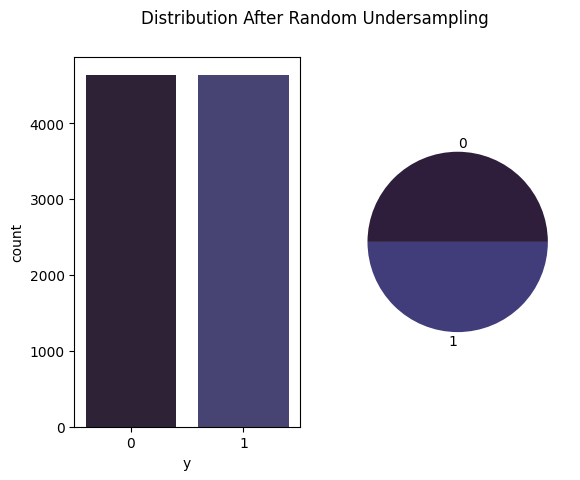

In [ ]:
plot_pie_count(y_res_r, "Random Undersampling", "mako")

## Tomek Links

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tl = TomekLinks()
X_res_t, y_res_t = tl.fit_resample(X, y)

In [ ]:
y_res_t

,y
0,0
1,0
2,0
3,0
4,0
...,...
39890,1
39891,0
39892,0
39893,1


In [ ]:
y_res_t.value_counts()

,count
y,
0,35256
1,4639


In [ ]:
len(y) - len(y_res_t)

1281

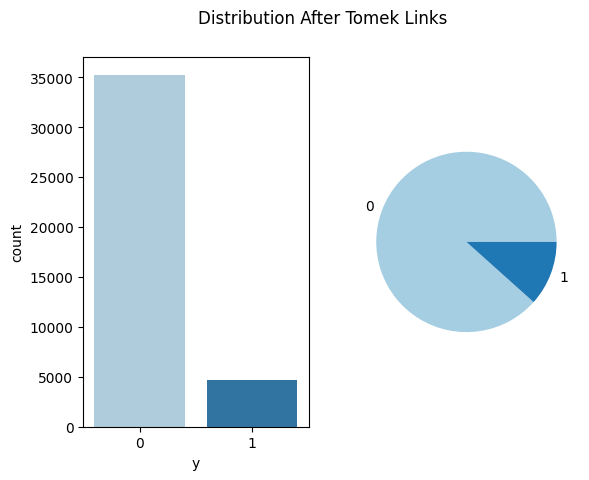

In [ ]:
plot_pie_count(y_res_t, "Tomek Links", "Paired")

## NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
nm = NearMiss(version= 1)
X_res_n, y_res_n = nm.fit_resample(X, y)

In [ ]:
y_res_n

,y
0,0
1,0
2,0
3,0
4,0
...,...
9273,1
9274,1
9275,1
9276,1


In [ ]:
y_res_n.value_counts()

,count
y,
0,4639
1,4639


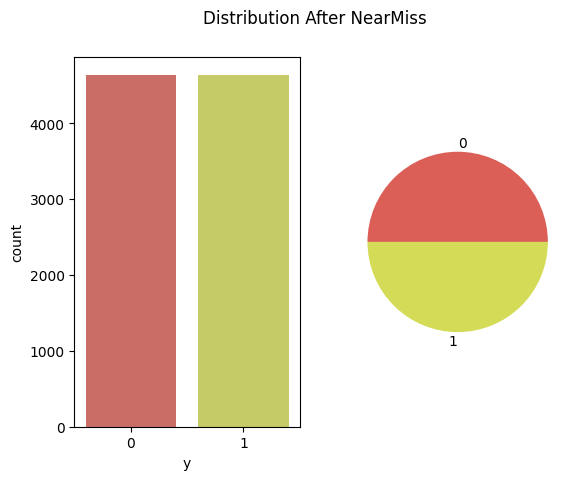

In [ ]:
plot_pie_count(y_res_n, "NearMiss", "hls")

## Utility Functions for Model Evaluation

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
def calculate_metrics(y_test, y_pred):

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print("TP: " + str(tp))
    print("TN: " + str(tn))
    print("FP: " + str(fp))
    print("FN: " + str(fn))
    print("")

    recall = tp / (tp + fn) * 100
    precision = tp / (tp + fp) * 100
    acc = accuracy_score(y_test, y_pred) * 100

    print("Recall: " + str(recall) + " %")
    print("Precision: " + str(precision) + " %")
    print("Accuracy : " +str(acc) + " %")

    return (recall, precision, acc)

In [ ]:
def train_evaluate(X, y):
  X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

  model = LogisticRegression()

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  recall, precision, acc = calculate_metrics(y_test, y_pred)

  return (recall, precision, acc)

In [ ]:
def plot_performance(recall, precision, accuracy):
  fig, ax = plt.subplots()

  metrics = ['Recall', 'Precision', 'Accuracy']
  counts = [recall, precision, accuracy]

  bar_labels = ['Recall', 'Precision', 'Accuracy']
  bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

  ax.bar(metrics, counts, label=bar_labels, color=bar_colors)

  ax.set_ylabel('Score')
  ax.legend(title='Evaluation Metrics')
  ax.set_ylim(0, 100)

plt.show()


## Model Training and Evaluations

### Evaluation of Original Data

In [ ]:
recall, precision, acc = train_evaluate(X, y)

TP: 550
TN: 10645
FP: 284
FN: 874

Recall: 38.62359550561798 %
Precision: 65.94724220623502 %
Accuracy : 90.6257589249575 %


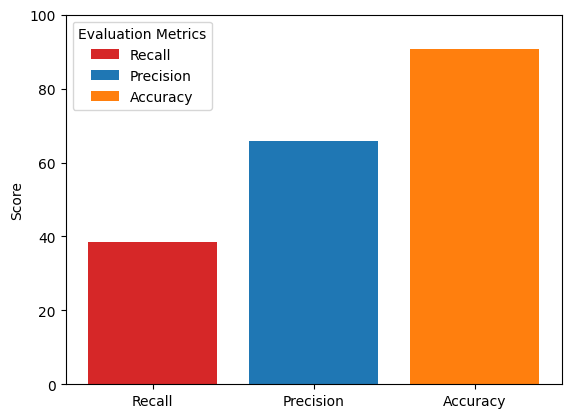

In [ ]:
plot_performance(recall, precision, acc)

### Evaluation of SMOTE

In [ ]:
recall, precision, acc = train_evaluate(X_res, y_res)

TP: 9627
TN: 9347
FP: 1682
FN: 1267

Recall: 88.36974481365888 %
Precision: 85.1268900875409 %
Accuracy : 86.54837385394335 %


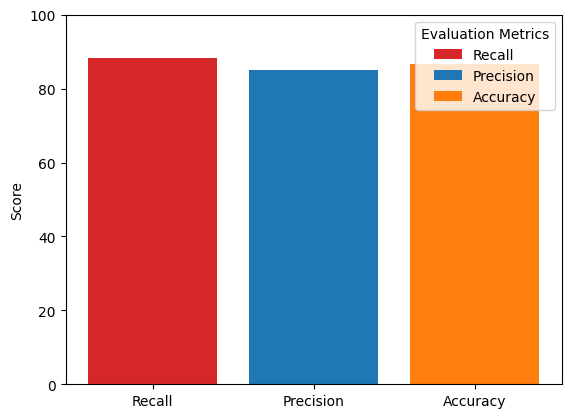

In [ ]:
plot_performance(recall, precision, acc)

### Evaluation of ADASYN

In [ ]:
recall, precision, acc = train_evaluate(X_res_a, y_res_a)

TP: 9659
TN: 8866
FP: 2066
FN: 1366

Recall: 87.60997732426303 %
Precision: 82.37953091684435 %
Accuracy : 84.36944937833037 %


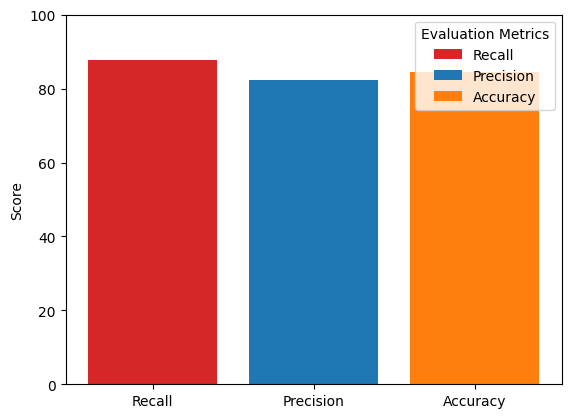

In [ ]:
plot_performance(recall, precision, acc)

### Evaluation of Borderline SMOTE

In [ ]:
recall, precision, acc = train_evaluate(X_res_b, y_res_b)

TP: 9676
TN: 9087
FP: 1942
FN: 1218

Recall: 88.81953368826878 %
Precision: 83.28455844379411 %
Accuracy : 85.58591433654153 %


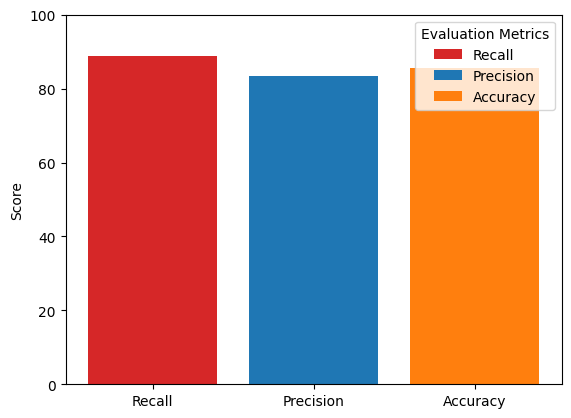

In [ ]:
plot_performance(recall, precision, acc)

### Evaluation of Random Undersampler

In [ ]:
recall, precision, acc = train_evaluate(X_res_r, y_res_r)

TP: 1173
TN: 1219
FP: 201
FN: 191

Recall: 85.99706744868035 %
Precision: 85.37117903930131 %
Accuracy : 85.91954022988506 %


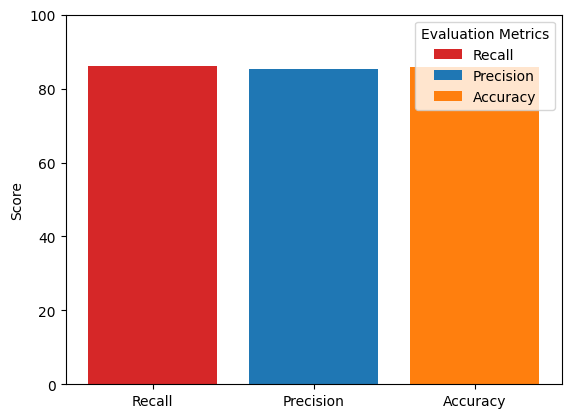

In [ ]:
plot_performance(recall, precision, acc)

### Evalutaion of Tomek Links

In [ ]:
recall, precision, acc = train_evaluate(X_res_t, y_res_t)

TP: 663
TN: 10312
FP: 237
FN: 757

Recall: 46.690140845070424 %
Precision: 73.66666666666667 %
Accuracy : 91.69521263263431 %


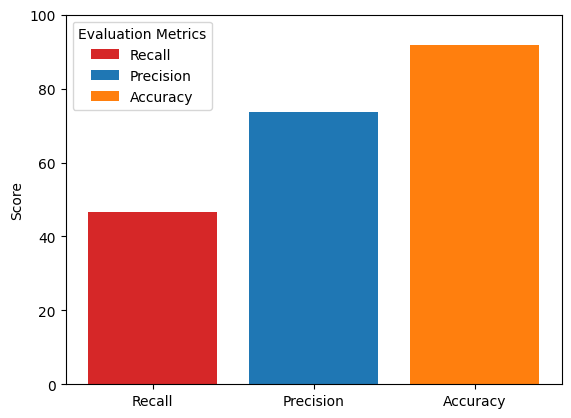

In [ ]:
plot_performance(recall, precision, acc)

### Evaluation of NearMiss

In [ ]:
recall, precision, acc  = train_evaluate(X_res_n, y_res_n)

TP: 1035
TN: 1149
FP: 271
FN: 329

Recall: 75.87976539589442 %
Precision: 79.24961715160796 %
Accuracy : 78.44827586206897 %


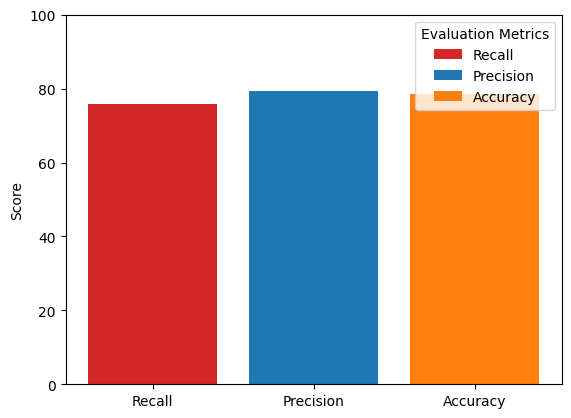

In [ ]:
plot_performance(recall, precision, acc)